In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [116]:
#CHECKING VERSION
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.4.2
numpy version: 1.22.4
seaborn version: 0.11.2


In [117]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-adjusted-index.csv'
df = pd.read_csv(url, parse_dates=['date']) #PARSE_DATE SUM COLUMNS IN ONE COLUMN. #URL GITHUB USE RAW DATA
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           867 non-null    datetime64[ns]
 1   iso_a3         867 non-null    object        
 2   currency_code  867 non-null    object        
 3   name           867 non-null    object        
 4   local_price    867 non-null    float64       
 5   dollar_ex      867 non-null    float64       
 6   dollar_price   867 non-null    float64       
 7   GDP_dollar     867 non-null    float64       
 8   adj_price      867 non-null    float64       
 9   USD            867 non-null    float64       
 10  EUR            867 non-null    float64       
 11  GBP            867 non-null    float64       
 12  JPY            867 non-null    float64       
 13  CNY            867 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 95.0+ KB


In [119]:
#SET DATA THAT WE NEED (YEAR2022/01) JUST SHOW NOT UPDATE DF 
df = df[(df['date'].dt.year==2022)&(df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
812,2022-01-01,ARG,ARS,Argentina,450.0,105.016500,4.285041,8571.94,3.288471,0.19685,0.15630,0.21147,0.71957,0.14250
813,2022-01-01,AUS,AUD,Australia,6.4,1.419346,4.509120,52905.40,4.945711,-0.16259,-0.19096,-0.15235,0.20316,-0.20061
814,2022-01-01,AZE,AZN,Azerbaijan,4.5,1.699000,2.648617,4232.32,3.126251,-0.22183,-0.24820,-0.21232,0.11803,-0.25717
815,2022-01-01,BHR,BHD,Bahrain,1.5,0.377000,3.978780,23589.96,3.849863,-0.05075,-0.08291,-0.03915,0.36384,-0.09385
816,2022-01-01,BRA,BRL,Brazil,22.9,5.310000,4.312618,6822.56,3.223077,0.22899,0.18735,0.24401,0.76575,0.17319


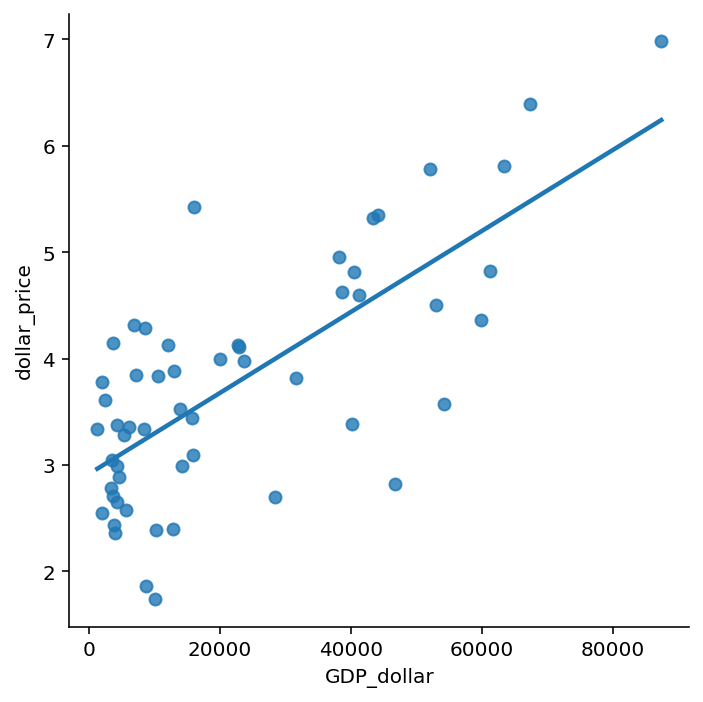

In [120]:
sns.lmplot(x='GDP_dollar',y='dollar_price',data=df, ci=None)
#CORRELATION CI MEAN SIZE OF CONFIDENCE
#lm = LINEAR MODEL

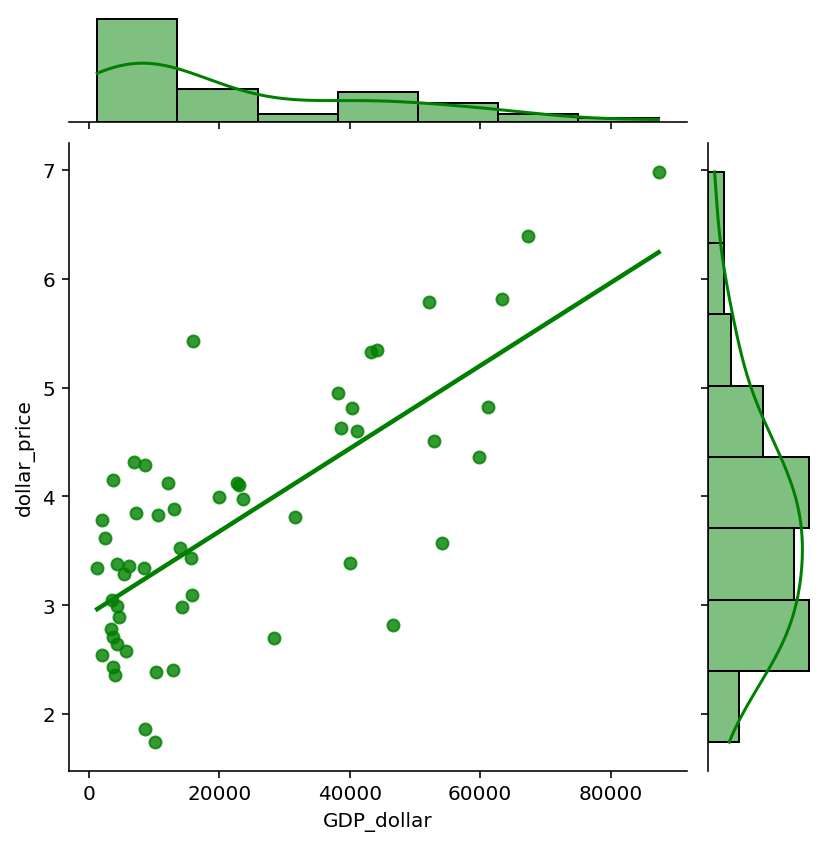

In [121]:
sns.jointplot(x='GDP_dollar',y='dollar_price',data=df, kind='reg',ci=None,color='green')

Sklearn: LinearRegression

In [122]:
#CREATE MODEL
model = LinearRegression()
model

LinearRegression()

In [123]:
x=df[['GDP_dollar']] #EXPECT 2D ARRAY NOT SERIES (1D) CAUSE IT WILL CAN USE MULTI-LINEAR
y=df.dollar_price

In [124]:
model.fit(x,y)

LinearRegression()

In [125]:
model.score(x,y)
#R-squared (R^2) is a statistical measure that represents the proportion of the variance 
#for a dependent variable that's explained by an independent variable or variables in a regression model.
#More R^2 more relation

0.5264709952213655

In [126]:
model.intercept_
#mean value of the response variable when predictor var. = 0.

2.9180946917235993

In [127]:
model.coef_

array([3.80511268e-05])

EQ. y=a+bx

In [128]:
#If GDA = 10000 what is the cost big mac should be?
model.intercept_+ model.coef_*10000

array([3.29860596])

In [129]:
#OR
model.predict([[10000]]) #x should be array 2D

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.29860596])

In [130]:
model.predict([[10000],
               [40000]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.29860596, 4.44013977])

In [131]:
model.predict(np.arange(40000,50001,2500).reshape(-1,1))
#Make 2D array
#np.arange (40000 to 50000 add 2500)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.44013977, 4.53526758, 4.6303954 , 4.72552322, 4.82065103])

In [132]:
model.predict(np.linspace(40000,50001,20).reshape(-1,1))
#np.linspace (40000 to 50001 20 values)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.44013977, 4.46016868, 4.48019759, 4.5002265 , 4.52025541,
       4.54028432, 4.56031323, 4.58034215, 4.60037106, 4.62039997,
       4.64042888, 4.66045779, 4.6804867 , 4.70051562, 4.72054453,
       4.74057344, 4.76060235, 4.78063126, 4.80066017, 4.82068909])

In [133]:
series = pd.Series(np.linspace(40000,50001,20))
series

0     40000.000000
1     40526.368421
2     41052.736842
3     41579.105263
4     42105.473684
5     42631.842105
6     43158.210526
7     43684.578947
8     44210.947368
9     44737.315789
10    45263.684211
11    45790.052632
12    46316.421053
13    46842.789474
14    47369.157895
15    47895.526316
16    48421.894737
17    48948.263158
18    49474.631579
19    50001.000000
dtype: float64

In [134]:
model.predict(series.to_frame()) #change to data frame

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.44013977, 4.46016868, 4.48019759, 4.5002265 , 4.52025541,
       4.54028432, 4.56031323, 4.58034215, 4.60037106, 4.62039997,
       4.64042888, 4.66045779, 4.6804867 , 4.70051562, 4.72054453,
       4.74057344, 4.76060235, 4.78063126, 4.80066017, 4.82068909])

In [135]:
df1 = pd.DataFrame(np.linspace(40000,50001,20),columns=['gdp'])
df1

,gdp
0,40000.000000
1,40526.368421
2,41052.736842
3,41579.105263
4,42105.473684
5,42631.842105
6,43158.210526
7,43684.578947
8,44210.947368
9,44737.315789


In [136]:
model.predict(df1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- gdp
Feature names seen at fit time, yet now missing:
- GDP_dollar

  warnings.warn(message, FutureWarning)


array([4.44013977, 4.46016868, 4.48019759, 4.5002265 , 4.52025541,
       4.54028432, 4.56031323, 4.58034215, 4.60037106, 4.62039997,
       4.64042888, 4.66045779, 4.6804867 , 4.70051562, 4.72054453,
       4.74057344, 4.76060235, 4.78063126, 4.80066017, 4.82068909])

## Statsmodels: Sim. Linear regression

In [137]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [138]:
#FORMULA: RESPONSE ~ predictor 
model_1 = smf.ols(formula='dollar_price ~ GDP_dollar',data=df).fit()

In [140]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     58.93
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.69e-10
Time:                        18:44:37   Log-Likelihood:                -63.353
No. Observations:                  55   AIC:                             130.7
Df Residuals:                      53   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9181      0.153     19.113      0.0

In [141]:
model_1.pvalues

Intercept     1.947632e-25
GDP_dollar    3.688995e-10
dtype: float64